# Del 9: Priprava in čiščenje podatkov - napredno
Poudarek na uporabi regexov

## Working With Strings In Pandas

### Data

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# read the data sets into pandas
world_dev = pd.read_csv("data/World_dev.csv")
happiness2015 = pd.read_csv('data/World_Happiness_2015.csv')

In [ ]:
world_dev.head()

In [ ]:
happiness2015.head()

In [5]:
merged = pd.merge(left=happiness2015, right=world_dev, how="left", left_on="Country", right_on="ShortName")

col_renaming = {'SourceOfMostRecentIncomeAndExpenditureData': 'IESurvey'}
merged.rename(col_renaming, axis=1, inplace=True)



In [6]:
merged.head(3)

,Country,Region_x,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),...,GovernmentAccountingConcept,ImfDataDisseminationStandard,LatestPopulationCensus,LatestHouseholdSurvey,IESurvey,VitalRegistrationComplete,LatestAgriculturalCensus,LatestIndustrialData,LatestTradeData,LatestWaterWithdrawalData
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2010,NaN,"Expenditure survey/budget survey (ES/BS), 2004",Yes,2008,2010.0,2013.0,2000.0
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,NaN,"Integrated household survey (IHS), 2010",Yes,2010,2005.0,2013.0,2005.0
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,NaN,"Income tax registers (ITR), 2010",Yes,2010,2010.0,2013.0,2009.0


### Using Apply to Transform Strings

In [9]:
# izlusci valute za posamezno drzavo -> nazaj dobis zadnjo besedo v columnu
merged["CurrencyUnit"].str.lower().str.split().str.get(-1)

0       franc
1       krona
2       krone
3       krone
4      dollar
        ...  
153     franc
154     franc
155       NaN
156     franc
157     franc
Name: CurrencyUnit, Length: 158, dtype: object

In [ ]:
words = 'Danish krone'



In [ ]:
def extract_last_word(element):
    return str(element).split()[-1]

### Vectorized String Methods

<img src="./images/Split.png">

<table class="tg">
<tbody><tr>
<th>Method</th>
<th>Description</th>
</tr>
<tr>
<td>Series.str.split()</td>
<td>Splits each element in the Series.</td>
</tr>
<tr>
<td>Series.str.strip()</td>
<td>Strips whitespace from each string in the Series.</td>
</tr>
<tr>
<td>Series.str.lower()</td>
<td>Converts strings in the Series to lowercase.</td>
</tr>
<tr>
<td>Series.str.upper()</td>
<td>Converts strings in the Series to uppercase.</td>
</tr>
<tr>
<td>Series.str.get()</td>
<td>Retrieves the ith element of each element in the Series.</td>
</tr>
<tr>
<td><span style="font-weight:300;font-style:normal">Series.str.replace()</span></td>
<td><span style="font-weight:300;font-style:normal">Replaces a regex or string in the Series with another string.</span></td>
</tr>
<tr>
<td>Series.str.cat()</td>
<td>Concatenates strings in a Series.</td>
</tr>
<tr>
<td><span style="font-weight:300;font-style:normal">Series.str.extract()</span></td>
<td><span style="font-weight:300;font-style:normal">Extracts substrings from the Series matching a regex pattern.</span></td>
</tr>
</tbody></table>

<img src="./images/Syntax.png">

#### Exploring Missing Values with Vectorized String Methods

In [ ]:
def compute_lengths(element):
    return len(str(element))

## Regular Expressions in Pandas

In [11]:
import re

print(re.match(r"and", "hand"))

None


In [12]:
print(re.match(r"and", "and"))

<re.Match object; span=(0, 3), match='and'>


In [13]:
print(re.search(r"and", "hand"))

<re.Match object; span=(1, 4), match='and'>


In [14]:
print(re.match(r"and", "andh"))

<re.Match object; span=(0, 3), match='and'>


In [16]:
merged["SpecialNotes"].head(10)

0                                                  NaN
1                                                  NaN
2                                                  NaN
3                                                  NaN
4    Fiscal year end: March 31; reporting period fo...
5    A simple multiplier is used to convert the nat...
6    A simple multiplier is used to convert the nat...
7    Fiscal year end: June 30; reporting period for...
8    Fiscal year end: March 31; reporting period fo...
9    Fiscal year end: June 30; reporting period for...
Name: SpecialNotes, dtype: object

In [18]:
# zanima nas ali naše besedilo vsebuje nek vzorec
merged["SpecialNotes"].str.contains(r"[Ff]iscal year") # [Ff] - array vrednosti ki so lahko na tem mestu

0        NaN
1        NaN
2        NaN
3        NaN
4       True
       ...  
153    False
154      NaN
155      NaN
156      NaN
157    False
Name: SpecialNotes, Length: 158, dtype: object

### The Regular Expression Module

### Finding Specific Words in Strings

<img src="./images/set_syntax_breakdown.svg">

<img src="./images/basic_match_2.svg">

In [19]:
hn=pd.read_csv('data/hacker_news.csv')

In [20]:
hn

,id,title,url,num_points,num_comments,author,created_at
0,12224879,Interactive Dynamic Video,http://www.interactivedynamicvideo.com/,386,52,ne0phyte,8/4/2016 11:52
1,11964716,Florida DJs May Face Felony for April Fools' W...,http://www.thewire.com/entertainment/2013/04/f...,2,1,vezycash,6/23/2016 22:20
2,11919867,Technology ventures: From Idea to Enterprise,https://www.amazon.com/Technology-Ventures-Ent...,3,1,hswarna,6/17/2016 0:01
3,10301696,Note by Note: The Making of Steinway L1037 (2007),http://www.nytimes.com/2007/11/07/movies/07ste...,8,2,walterbell,9/30/2015 4:12
4,10482257,Title II kills investment? Comcast and other I...,http://arstechnica.com/business/2015/10/comcas...,53,22,Deinos,10/31/2015 9:48
...,...,...,...,...,...,...,...
20094,12379592,How Purism Avoids Intels Active Management Tec...,https://puri.sm/philosophy/how-purism-avoids-i...,10,6,AdmiralAsshat,8/29/2016 2:22
20095,10339284,YC Application Translated and Broken Down,https://medium.com/@zreitano/the-yc-applicatio...,4,1,zreitano,10/6/2015 14:57
20096,10824382,Microkernels are slow and Elvis didn't do no d...,http://blog.darknedgy.net/technology/2016/01/0...,169,132,vezzy-fnord,1/2/2016 0:49
20097,10739875,How Product Hunt really works,https://medium.com/@benjiwheeler/how-product-h...,695,222,brw12,12/15/2015 19:32


In [27]:
# Izluščite vse python novice
hn[hn["title"].str.contains(r"[Pp]ython")].head()

,id,title,url,num_points,num_comments,author,created_at
102,10974870,From Python to Lua: Why We Switched,https://www.distelli.com/blog/using-lua-for-ou...,243,188,chase202,1/26/2016 18:17
103,11244541,Ubuntu 16.04 LTS to Ship Without Python 2,http://news.softpedia.com/news/ubuntu-16-04-lt...,2,1,_snydly,3/8/2016 10:39
144,10963528,Create a GUI Application Using Qt and Python i...,http://digitalpeer.com/s/c63e,21,1,zoodle,1/24/2016 19:01
196,10716331,How I Solved GCHQ's Xmas Card with Python and ...,http://matthewearl.github.io/2015/12/10/gchq-x...,6,1,kipi,12/11/2015 10:38
436,11895088,"Unikernel Power Comes to Java, Node.js, Go, an...",http://www.infoworld.com/article/3082051/open-...,3,1,syslandscape,6/13/2016 16:23


In [30]:
# Izluščite vse novice z email besedo
hn[hn["title"].str.contains(r"e-?mail")].head(10)

# ? ... char se ponovi nič ali 1-krat

,id,title,url,num_points,num_comments,author,created_at
119,10603601,Show HN: Send an email from your shell to your...,https://ping.registryd.com,4,1,ybrs,11/20/2015 20:23
313,10736929,Disposable emails for safe spam free shopping,http://couponinbox.com,1,1,genesem,12/15/2015 10:20
1361,11079401,Ask HN: Doing cold emails? helps us prove this...,NaN,8,12,going_to_800,2/11/2016 10:48
1750,12021044,"Protect yourself from spam, bots and phishing ...",http://die.life?x=3,4,2,code2crud,7/2/2016 2:04
2421,10934913,Ashley Madison hack treating email,http://pastebin.com/V5tmcFXq,7,4,hippich,1/19/2016 23:24
2685,10976311,Ask HN: Weather forecast in your email daily,NaN,3,3,kayman,1/26/2016 21:39
3379,10347778,Ask HN: How do we solve the email problem?,NaN,2,6,cmacole,10/7/2015 18:09
3865,12107688,What Mailchimp does to make sure emails get de...,http://www.wired.com/2016/07/mailchimp-sends-b...,136,77,connie219,7/16/2016 20:08
3889,12040279,Show HN: Do you know what emails your competit...,https://beetle.email?utm_source=hackernews,1,1,chrift,7/5/2016 23:40
3921,11887562,Im killing most of my email capture. Here's why.,http://www.nateliason.com/email-capture/,13,2,3stripe,6/12/2016 11:03


In [43]:
# Izluši email naslove
re_email = r"[\w\d\-\.]+@[\w]+\.\w+"
hn.loc[hn["title"].str.contains(re_email), "title"].head(10)
hn.loc[1057,"title"]

'Site for generating bids and invoices- User:test000@bidvoice.co PW:Test_000'

In [52]:
# želimo ugotoviti vse tipe podatkovnih baz
# extractamo s pomocjo capture group
re_sql_db = r"(\w+SQL\w*)"
hn["title"].str.extract(re_sql_db, flags=re.I).value_counts()

PostgreSQL    27
NoSQL         16
MySQL         12
CloudSQL       1
MemSQL         1
SparkSQL       1
mySql          1
nosql          1
dtype: int64

In [61]:
# Izbiranje URLjev -> splitamo stolpec na tri nove stolpce ["protocol", "domain", "path"]
pd.options.display.max_colwidth = 300
re_url = r"(?P<protocol>https?):\/\/(?P<domain>[\w\.]+)\/?(?P<path>[^\s]*)"
hn["url"].str.extract(re_url, flags=re.I)

,protocol,domain,path
0,http,www.interactivedynamicvideo.com,
1,http,www.thewire.com,entertainment/2013/04/florida-djs-april-fools-water-joke/63798/
2,https,www.amazon.com,Technology-Ventures-Enterprise-Thomas-Byers/dp/0073523429
3,http,www.nytimes.com,2007/11/07/movies/07stein.html?_r=0
4,http,arstechnica.com,business/2015/10/comcast-and-other-isps-boost-network-investment-despite-net-neutrality/
...,...,...,...
20094,https,puri.sm,philosophy/how-purism-avoids-intels-active-management-technology/
20095,https,medium.com,@zreitano/the-yc-application-broken-down-and-translated-e4c0f5235081
20096,http,blog.darknedgy.net,technology/2016/01/01/0/
20097,https,medium.com,@benjiwheeler/how-product-hunt-really-works-d8fdcda1da74


### Using Regular Expressions to Select Data

In [ ]:
try:
    merged[national_accounts]
except ValueError as e:
    print(e)

### Import new dataset

In [ ]:
hn = pd.read_csv('data/hacker_news.csv')

### Quantifiers


<p></p><center><img alt="quantifier example" src="images/quantifier_example.svg"></center><p></p>

<p></p><center><img alt="quantifiers" src="images/quantifiers_numeric.svg"></center><p></p>

<p></p><center><img alt="quantifiers" src="images/quantifiers_other.svg"></center><p></p>


### Character Classes


<p></p><center><img alt="character classes one" src="images/character_classes_v2_1.svg"></center><p></p>

<p></p><center><img alt="character classes two" src="images/character_classes_v2_2.svg"></center><p></p>


### Raw strings

### Extracting Substrings from a Series

### Using Flags to Modify Regex Patterns

### Primer: Create a frequency table of the different capitalizations of SQL

### Primer: Versions of Python

### Primer: Extracting URL Parts

#### Using Named Capture Groups

### Primer: Clean a String Column, Aggregate the Data, and Plot the Results

<table class="tg">
<tbody><tr>
<th>Method</th>
<th>Description</th>
</tr>
<tr>
<td>Series.str.split()</td>
<td>Splits each element in the Series.</td>
</tr>
<tr>
<td>Series.str.strip()</td>
<td>Strips whitespace from each string in the Series.</td>
</tr>
<tr>
<td>Series.str.lower()</td>
<td>Converts strings in the Series to lowercase.</td>
</tr>
<tr>
<td>Series.str.upper()</td>
<td>Converts strings in the Series to uppercase.</td>
</tr>
<tr>
<td>Series.str.get()</td>
<td>Retrieves the ith element of each element in the Series.</td>
</tr>
<tr>
<td><span style="font-weight:300;font-style:normal">Series.str.replace()</span></td>
<td><span style="font-weight:300;font-style:normal">Replaces a regex or string in the Series with another string.</span></td>
</tr>
<tr>
<td>Series.str.cat()</td>
<td>Concatenates strings in a Series.</td>
</tr>
<tr>
<td><span style="font-weight:300;font-style:normal">Series.str.extract()</span></td>
<td><span style="font-weight:300;font-style:normal">Extracts substrings from the Series matching a regex pattern.</span></td>
</tr>
</tbody></table>

## Working With Missing Data

### Introduction

In [62]:
happiness2015 = pd.read_csv('data/wh_2015.csv') 
happiness2016 = pd.read_csv('data/wh_2016.csv') 
happiness2017 = pd.read_csv('data/wh_2017.csv')

In [63]:
shape_2015 = happiness2015.shape
shape_2016 = happiness2016.shape
shape_2017 = happiness2017.shape

In [64]:
shape_2015

(164, 13)

In [65]:
shape_2016

(164, 14)

In [66]:
shape_2017

(164, 13)

### Identifying Missing Values

In [70]:
missing = happiness2015["Happiness Score"].isnull()
missing

0      False
1      False
2      False
3      False
4      False
       ...  
159     True
160     True
161     True
162     True
163     True
Name: Happiness Score, Length: 164, dtype: bool

In [71]:
happiness2015[missing]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
158,Belize,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
159,Namibia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
160,Puerto Rico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
161,Somalia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
162,Somaliland Region,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
163,South Sudan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015


In [72]:
happiness2015.isnull().sum()
# happiness2015.isna().sum() enaka funkcija !

Country                          0
Region                           6
Happiness Rank                   6
Happiness Score                  6
Standard Error                   6
Economy (GDP per Capita)         6
Family                           6
Health (Life Expectancy)         6
Freedom                          6
Trust (Government Corruption)    6
Generosity                       6
Dystopia Residual                6
Year                             0
dtype: int64

In [77]:
missing_2016 = happiness2016.isnull()
missing_2016.sum()

Country                          0
Region                           7
Happiness Rank                   7
Happiness Score                  7
Lower Confidence Interval        7
Upper Confidence Interval        7
Economy (GDP per Capita)         7
Family                           7
Health (Life Expectancy)         7
Freedom                          7
Trust (Government Corruption)    7
Generosity                       7
Dystopia Residual                7
Year                             0
dtype: int64

In [78]:
missing_2017 = happiness2017.isnull()
missing_2017.sum()

Country                          0
Happiness.Rank                   9
Happiness.Score                  9
Whisker.high                     9
Whisker.low                      9
Economy..GDP.per.Capita.         9
Family                           9
Health..Life.Expectancy.         9
Freedom                          9
Generosity                       9
Trust..Government.Corruption.    9
Dystopia.Residual                9
Year                             0
dtype: int64

In [79]:
combined=pd.concat([happiness2015, happiness2016, happiness2017], ignore_index=True, sort=True)

In [81]:
combined.head()


,Country,Dystopia Residual,Dystopia.Residual,Economy (GDP per Capita),Economy..GDP.per.Capita.,Family,Freedom,Generosity,Happiness Rank,Happiness Score,...,Health..Life.Expectancy.,Lower Confidence Interval,Region,Standard Error,Trust (Government Corruption),Trust..Government.Corruption.,Upper Confidence Interval,Whisker.high,Whisker.low,Year
0,Switzerland,2.51738,NaN,1.39651,NaN,1.34951,0.66557,0.29678,1.0,7.587,...,NaN,NaN,Western Europe,0.03411,0.41978,NaN,NaN,NaN,NaN,2015
1,Iceland,2.70201,NaN,1.30232,NaN,1.40223,0.62877,0.43630,2.0,7.561,...,NaN,NaN,Western Europe,0.04884,0.14145,NaN,NaN,NaN,NaN,2015
2,Denmark,2.49204,NaN,1.32548,NaN,1.36058,0.64938,0.34139,3.0,7.527,...,NaN,NaN,Western Europe,0.03328,0.48357,NaN,NaN,NaN,NaN,2015
3,Norway,2.46531,NaN,1.45900,NaN,1.33095,0.66973,0.34699,4.0,7.522,...,NaN,NaN,Western Europe,0.03880,0.36503,NaN,NaN,NaN,NaN,2015
4,Canada,2.45176,NaN,1.32629,NaN,1.32261,0.63297,0.45811,5.0,7.427,...,NaN,NaN,North America,0.03553,0.32957,NaN,NaN,NaN,NaN,2015


In [82]:
combined.tail()

,Country,Dystopia Residual,Dystopia.Residual,Economy (GDP per Capita),Economy..GDP.per.Capita.,Family,Freedom,Generosity,Happiness Rank,Happiness Score,...,Health..Life.Expectancy.,Lower Confidence Interval,Region,Standard Error,Trust (Government Corruption),Trust..Government.Corruption.,Upper Confidence Interval,Whisker.high,Whisker.low,Year
487,Puerto Rico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017
488,Somaliland Region,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017
489,Somaliland region,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017
490,Suriname,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017
491,Swaziland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017


In [83]:
combined.isnull().sum()

Country                            0
Dystopia Residual                177
Dystopia.Residual                337
Economy (GDP per Capita)         177
Economy..GDP.per.Capita.         337
Family                            22
Freedom                           22
Generosity                        22
Happiness Rank                   177
Happiness Score                  177
Happiness.Rank                   337
Happiness.Score                  337
Health (Life Expectancy)         177
Health..Life.Expectancy.         337
Lower Confidence Interval        335
Region                           177
Standard Error                   334
Trust (Government Corruption)    177
Trust..Government.Corruption.    337
Upper Confidence Interval        335
Whisker.high                     337
Whisker.low                      337
Year                               0
dtype: int64

### Correcting Data Cleaning Errors that Result in Missing Values

In [116]:
happiness2015.columns = happiness2015.columns.str.replace('.',' ', regex=True) \
    .str.replace("\s", ' ', regex=True)\
    .str.replace("(", '', regex=True) \
    .str.replace(")", '', regex=True) \
    .str.replace('  ', ' ', regex=True) \
    .str.strip() \
    .str.upper()

In [117]:
happiness2015.head()

,COUNTRY,REGION,HAPPINESS RANK,HAPPINESS SCORE,STANDARD ERROR,ECONOMY GDP PER CAPITA,FAMILY,HEALTH LIFE EXPECTANCY,FREEDOM,TRUST GOVERNMENT CORRUPTION,GENEROSITY,DYSTOPIA RESIDUAL,YEAR
0,Switzerland,Western Europe,1.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,Western Europe,2.0,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,Denmark,Western Europe,3.0,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,Norway,Western Europe,4.0,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,Canada,North America,5.0,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015


In [114]:
happiness2016.columns = happiness2016.columns.str.replace('.',' ', regex=True) \
    .str.replace("\s", ' ', regex=True)\
    .str.replace("(", '', regex=True) \
    .str.replace(")", '', regex=True) \
    .str.replace('  ', ' ', regex=True) \
    .str.strip() \
    .str.upper()

In [115]:
happiness2016.head()

,COUNTRY,REGION,HAPPINESS RANK,HAPPINESS SCORE,LOWER CONFIDENCE INTERVAL,UPPER CONFIDENCE INTERVAL,ECONOMY GDP PER CAPITA,FAMILY,HEALTH LIFE EXPECTANCY,FREEDOM,TRUST GOVERNMENT CORRUPTION,GENEROSITY,DYSTOPIA RESIDUAL,YEAR
0,Denmark,Western Europe,1.0,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939,2016
1,Switzerland,Western Europe,2.0,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463,2016
2,Iceland,Western Europe,3.0,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137,2016
3,Norway,Western Europe,4.0,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465,2016
4,Finland,Western Europe,5.0,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596,2016


In [110]:
happiness2017.columns = happiness2017.columns.str.replace('.',' ', regex=True) \
    .str.replace("\s", ' ', regex=True)\
    .str.replace("(", '', regex=True) \
    .str.replace(")", '', regex=True) \
    .str.replace('  ', ' ', regex=True) \
    .str.strip() \
    .str.upper()

In [111]:
happiness2017.head()

,COUNTRY,HAPPINESS RANK,HAPPINESS SCORE,WHISKER HIGH,WHISKER LOW,ECONOMY GDP PER CAPITA,FAMILY,HEALTH LIFE EXPECTANCY,FREEDOM,GENEROSITY,TRUST GOVERNMENT CORRUPTION,DYSTOPIA RESIDUAL,YEAR
0,Norway,1.0,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,2017
1,Denmark,2.0,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,2017
2,Iceland,3.0,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,2017
3,Switzerland,4.0,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,2017
4,Finland,5.0,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,2017


In [118]:
combined=pd.concat([happiness2015, happiness2016, happiness2017], ignore_index=True, sort=True)

In [119]:
combined

,COUNTRY,DYSTOPIA RESIDUAL,ECONOMY GDP PER CAPITA,FAMILY,FREEDOM,GENEROSITY,HAPPINESS RANK,HAPPINESS SCORE,HEALTH LIFE EXPECTANCY,LOWER CONFIDENCE INTERVAL,REGION,STANDARD ERROR,TRUST GOVERNMENT CORRUPTION,UPPER CONFIDENCE INTERVAL,WHISKER HIGH,WHISKER LOW,YEAR
0,Switzerland,2.51738,1.39651,1.34951,0.66557,0.29678,1.0,7.587,0.94143,NaN,Western Europe,0.03411,0.41978,NaN,NaN,NaN,2015
1,Iceland,2.70201,1.30232,1.40223,0.62877,0.43630,2.0,7.561,0.94784,NaN,Western Europe,0.04884,0.14145,NaN,NaN,NaN,2015
2,Denmark,2.49204,1.32548,1.36058,0.64938,0.34139,3.0,7.527,0.87464,NaN,Western Europe,0.03328,0.48357,NaN,NaN,NaN,2015
3,Norway,2.46531,1.45900,1.33095,0.66973,0.34699,4.0,7.522,0.88521,NaN,Western Europe,0.03880,0.36503,NaN,NaN,NaN,2015
4,Canada,2.45176,1.32629,1.32261,0.63297,0.45811,5.0,7.427,0.90563,NaN,North America,0.03553,0.32957,NaN,NaN,NaN,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487,Puerto Rico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017
488,Somaliland Region,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017
489,Somaliland region,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017
490,Suriname,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017


In [120]:
combined.isnull().sum()

COUNTRY                          0
DYSTOPIA RESIDUAL               22
ECONOMY GDP PER CAPITA          22
FAMILY                          22
FREEDOM                         22
GENEROSITY                      22
HAPPINESS RANK                  22
HAPPINESS SCORE                 22
HEALTH LIFE EXPECTANCY          22
LOWER CONFIDENCE INTERVAL      335
REGION                         177
STANDARD ERROR                 334
TRUST GOVERNMENT CORRUPTION     22
UPPER CONFIDENCE INTERVAL      335
WHISKER HIGH                   337
WHISKER LOW                    337
YEAR                             0
dtype: int64

### Visualizing Missing Data

In [121]:
import seaborn as sns

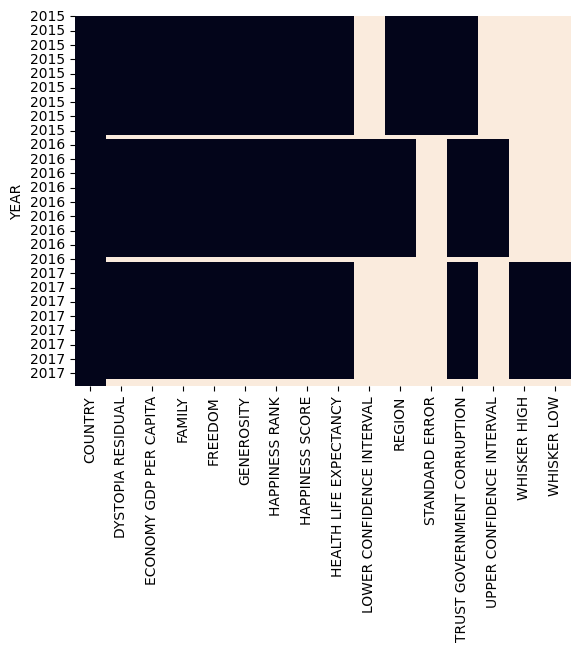

In [126]:
combined_updated = combined.set_index('YEAR')
sns.heatmap(combined_updated.isnull(), cbar=False)
plt.show()

In [127]:
regions_2017 = combined[combined['YEAR'] == 2017]['REGION']

In [130]:
missing = regions_2017.isnull().sum()
missing

164

### Using Data From Additional Sources to Fill in Missing Values

In [133]:
regions_2015 = happiness2015[['COUNTRY', 'REGION']].copy()
regions_2016 = happiness2016[['COUNTRY', 'REGION']].copy()
regions=pd.concat([regions_2015, regions_2016], ignore_index=True)
regions.dropna(inplace=True)
regions.drop_duplicates(inplace=True)


In [134]:
regions.head()

,COUNTRY,REGION
0,Switzerland,Western Europe
1,Iceland,Western Europe
2,Denmark,Western Europe
3,Norway,Western Europe
4,Canada,North America


In [135]:
combined = pd.merge(left=combined,right=regions, on='COUNTRY', how='left')

In [139]:
combined.head()

,COUNTRY,DYSTOPIA RESIDUAL,ECONOMY GDP PER CAPITA,FAMILY,FREEDOM,GENEROSITY,HAPPINESS RANK,HAPPINESS SCORE,HEALTH LIFE EXPECTANCY,LOWER CONFIDENCE INTERVAL,REGION_x,STANDARD ERROR,TRUST GOVERNMENT CORRUPTION,UPPER CONFIDENCE INTERVAL,WHISKER HIGH,WHISKER LOW,YEAR,REGION_y
0,Switzerland,2.51738,1.39651,1.34951,0.66557,0.29678,1.0,7.587,0.94143,NaN,Western Europe,0.03411,0.41978,NaN,NaN,NaN,2015,Western Europe
1,Iceland,2.70201,1.30232,1.40223,0.62877,0.43630,2.0,7.561,0.94784,NaN,Western Europe,0.04884,0.14145,NaN,NaN,NaN,2015,Western Europe
2,Denmark,2.49204,1.32548,1.36058,0.64938,0.34139,3.0,7.527,0.87464,NaN,Western Europe,0.03328,0.48357,NaN,NaN,NaN,2015,Western Europe
3,Norway,2.46531,1.45900,1.33095,0.66973,0.34699,4.0,7.522,0.88521,NaN,Western Europe,0.03880,0.36503,NaN,NaN,NaN,2015,Western Europe
4,Canada,2.45176,1.32629,1.32261,0.63297,0.45811,5.0,7.427,0.90563,NaN,North America,0.03553,0.32957,NaN,NaN,NaN,2015,North America


In [141]:
combined=combined.drop('REGION_x', axis=1)


KeyError: "['REGION_x'] not found in axis"

In [142]:
combined.columns.str.replace('REGION_y', 'REGION')

Index(['COUNTRY', 'DYSTOPIA RESIDUAL', 'ECONOMY GDP PER CAPITA', 'FAMILY',
       'FREEDOM', 'GENEROSITY', 'HAPPINESS RANK', 'HAPPINESS SCORE',
       'HEALTH LIFE EXPECTANCY', 'LOWER CONFIDENCE INTERVAL', 'STANDARD ERROR',
       'TRUST GOVERNMENT CORRUPTION', 'UPPER CONFIDENCE INTERVAL',
       'WHISKER HIGH', 'WHISKER LOW', 'YEAR', 'REGION'],
      dtype='object')

### Identifying Duplicates Values

In [144]:
dups=combined.duplicated(['COUNTRY', 'YEAR'])

### Correcting Duplicates Values

### Handle Missing Values by Dropping Columns

In [ ]:
columns_to_drop = ['LOWER CONFIDENCE INTERVAL', 'STANDARD ERROR', 
                   'UPPER CONFIDENCE INTERVAL', 'WHISKER HIGH', 
                   'WHISKER LOW']

### Analyzing Missing Data

### Handling Missing Values with Imputation

### Dropping Rows

## Identifying Hidden Missing Data

### Primer: Happiness 2015

In [ ]:
happiness2015 = pd.read_csv('data/wh_2015_special.csv')

### Primer: Diabetes

In [ ]:
diabetes = pd.read_csv('data/pima-indians-diabetes_data.csv')

#### Analyzing missingness percentage

## Andvance Visualization of Missing Data

In [ ]:
# Import missingno as msno
import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline

### Missingness Patterns

## Handle Missing Values

### Dropping Rows

### Imputation Techniques

#### Mean & median imputation


#### Mode and constant imputation

#### Visualize imputations

In [ ]:



imputations = {'Mean Imputation': diabetes_mean, 'Median Imputation': diabetes_median, 
               'Most Frequent Imputation': diabetes_mode, 'Constant Imputation': diabetes_constant}

